<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/MOVIE_RECOMMENDER_BACKEND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#MODEL IMPORTS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#VALIDATION METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import os

In [7]:
pwd = os.getcwd()

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#DATA VERIFICATION


In [9]:
movies = pd.read_csv('/content/drive/MyDrive/DATASET/tmdb_5000_movies.csv')

In [10]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [11]:
credits = pd.read_csv('/content/drive/MyDrive/DATASET/tmdb_5000_credits.csv')

In [12]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [13]:
df = movies.merge(credits, on= 'title')


#**EDA**

In [14]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [15]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

###Relation between budget and revenue


<Axes: xlabel='budget', ylabel='revenue'>

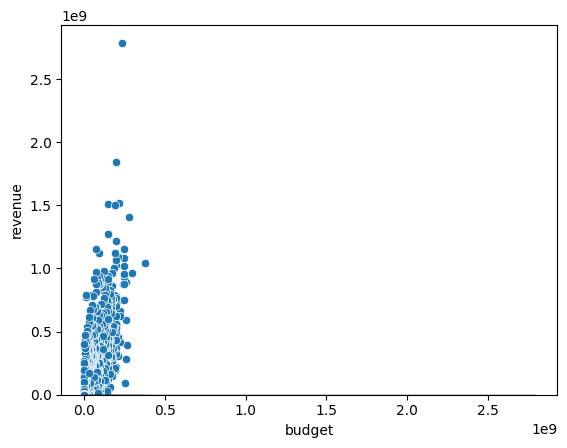

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot to visualize the relationship between budget and revenue
sns.scatterplot(x='budget', y='revenue', data=df)

# Create a histogram to visualize the distribution of budget
sns.histplot(df['budget'], bins=20)

# Create a histogram to visualize the distribution of revenue
sns.histplot(df['revenue'], bins=20)


This show that there is not much corellation between the budget the the revenue of the movie since even movies with the same budget can make more or less.


###Genre popularity


In [17]:
df[['genres']]

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...
4804,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4805,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4806,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4807,[]


In [18]:
import pandas as pd
import json
import matplotlib.pyplot as plt

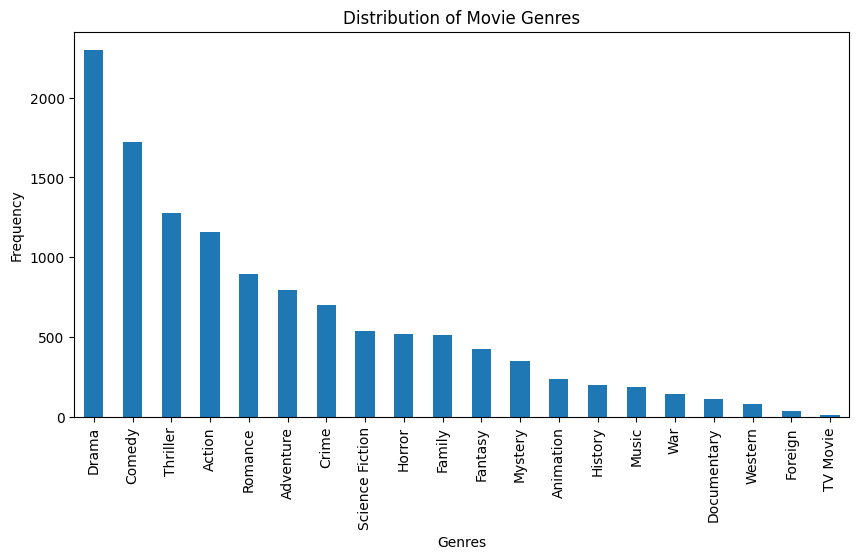

In [19]:
genres = df['genres'].apply(lambda x: [i['name'] for i in json.loads(x)])

# Flatten the list of genres
genres_list = [genre for sublist in genres for genre in sublist]

# Create a pandas series from the list of genres and plot a bar chart
genres_series = pd.Series(genres_list).value_counts().plot(kind='bar', figsize=(10,5))
genres_series.set_xlabel('Genres')
genres_series.set_ylabel('Frequency')
genres_series.set_title('Distribution of Movie Genres')
plt.show()

The Drama Category stands out with respect to any other category, followed by comedy and thriller.

###Language analysis - Top 3


In [20]:
import plotly.express as px

# Get the top 3 languages by count
top_languages = df['original_language'].value_counts().nlargest(3)

# Create a pie chart with the top 3 languages using Plotly
fig = px.pie(names=top_languages.index, values=top_languages, title='Proportion of Movies by Language (Top 3)')

# Show the pie chart
fig.show()


The top 3 languages are english , french and espoangol. However this doesnt seem to be an even spread since most of the movies are in english and can be ommitted during the final recommender system


###Production company

In [21]:
import plotly.graph_objs as go

companies = df.loc[df['production_companies'] != '[]', 'production_companies'].str.split('|', expand=True).stack().value_counts()
top10 = companies.head(10)

# create trace for bar chart
trace = go.Bar(
    x=top10.values,
    y=top10.index,
    orientation='h',
    text=top10.values,
    textposition='auto',
    marker=dict(color='#636EFA')
)

# create layout for chart
layout = go.Layout(
    title='Top 10 Production Companies',
    xaxis=dict(title='Number of Movies'),
    yaxis=dict(title='Production Company'),
    height=500,
    margin=dict(l=100, r=20, t=60, b=60)
)

# create figure and show chart
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [22]:
# Count number of rows where production_companies is empty or has no names
no_companies = len(df[df['production_companies'].apply(lambda x: True if x == '[]' or x == '[{}]' else False)])

# Print the result
print(f"Number of movies with no production companies: {no_companies}")


Number of movies with no production companies: 352


###Release date Analysis



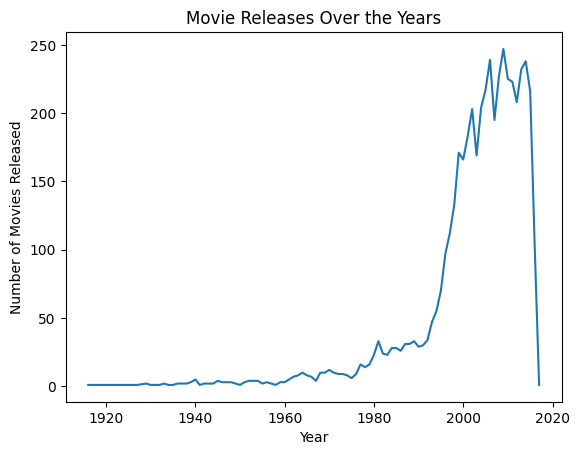

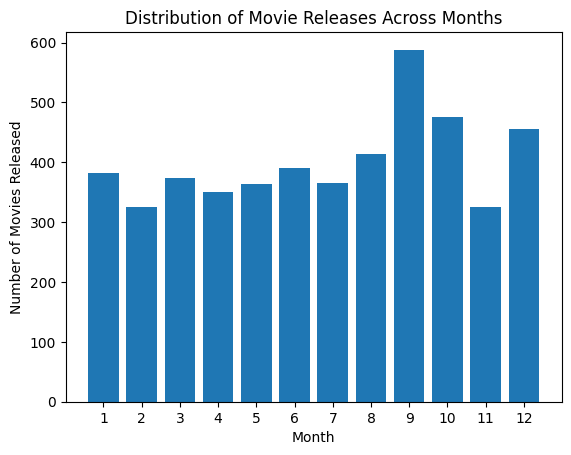

In [23]:
# Convert release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Count the number of movies released in each year
year_counts = df['release_date'].dt.year.value_counts().sort_index()

# Create a line plot to visualize the trend in movie releases over the years
plt.plot(year_counts.index, year_counts.values)
plt.title('Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

# Count the number of movies released in each month
month_counts = df['release_date'].dt.month.value_counts().sort_index()

# Create a bar plot to visualize the distribution of movie releases across months
plt.bar(month_counts.index, month_counts.values)
plt.title('Distribution of Movie Releases Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(range(1, 13))
plt.show()


The no of movies that were released increased exponentially around the 2000's and remained that way , folllowing a similar trajectory afterwards too.


The busiest month for tmovies has been September.


###Popularity vs budget,revenue and vote count


<Axes: xlabel='budget', ylabel='popularity'>

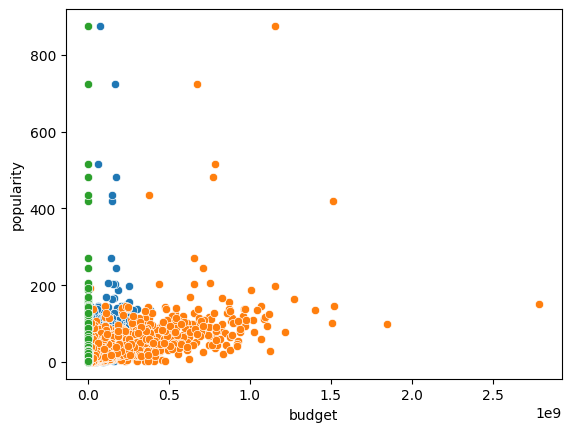

In [24]:
# Create a scatter plot to visualize the correlation between popularity and budget
sns.scatterplot(x='budget', y='popularity', data=df)

# Create a scatter plot to visualize the correlation between popularity and revenue
sns.scatterplot(x='revenue', y='popularity', data=df)

# Create a scatter plot to visualize the correlation between popularity and vote count
sns.scatterplot(x='vote_count', y='popularity', data=df)




<Axes: >

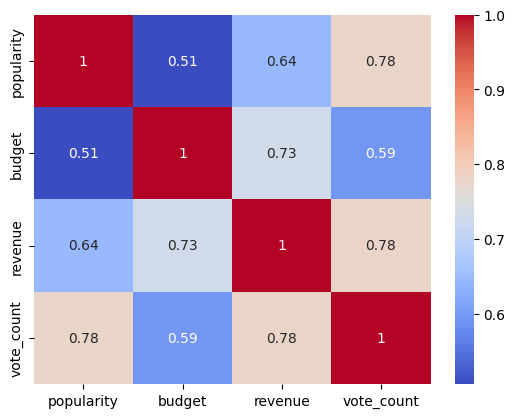

In [25]:

# Create a heatmap to visualize the correlation matrix between popularity, budget, revenue, and vote count
corr = df[['popularity', 'budget', 'revenue', 'vote_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

###Voting Analysis


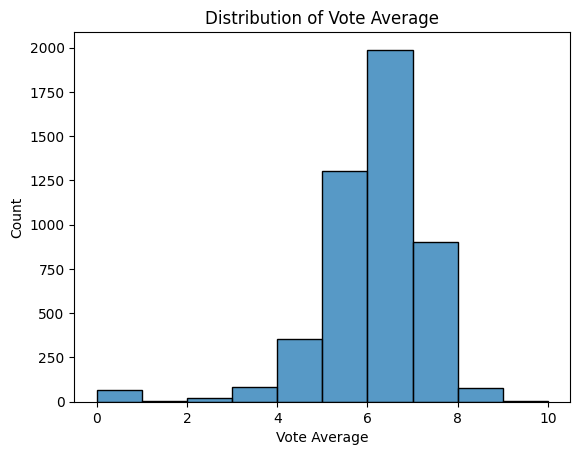

In [26]:
# Plot distribution of vote_average
sns.histplot(df['vote_average'], kde=False, bins=10)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()




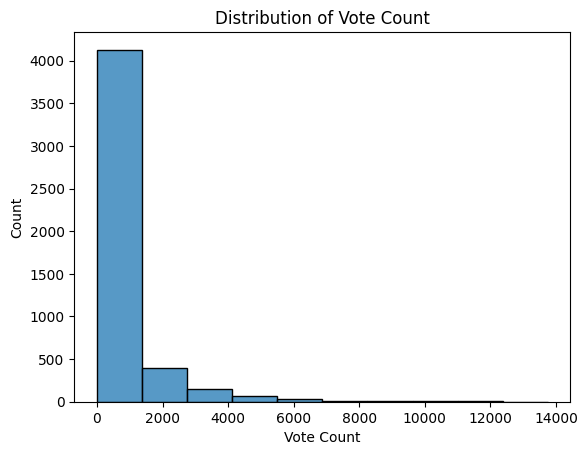

In [27]:
# Plot distribution of vote_count
sns.histplot(df['vote_count'], kde=False, bins=10)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.show()

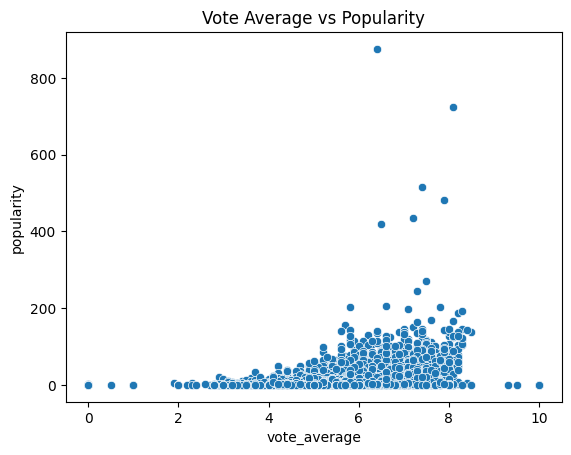

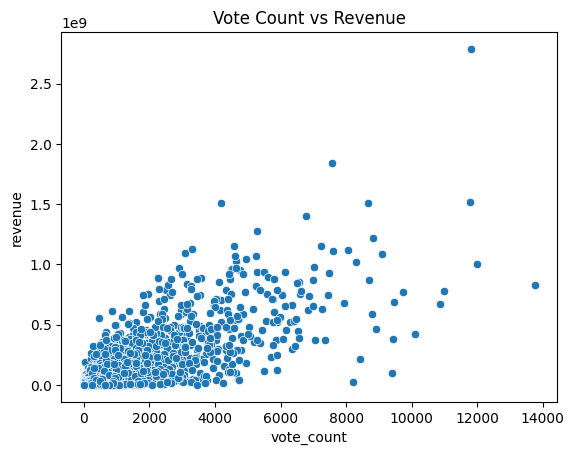

In [28]:
# Create scatter plot of vote_average vs popularity
sns.scatterplot(x='vote_average', y='popularity', data=df)
plt.title('Vote Average vs Popularity')
plt.show()

# Create scatter plot of vote_count vs revenue
sns.scatterplot(x='vote_count', y='revenue', data=df)
plt.title('Vote Count vs Revenue')
plt.show()


#Data Preparation


Keeping only the relevant attributes required for a recommender system

In [29]:
movies = df[['movie_id','title','overview','genres','keywords','cast','crew']]


In [30]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [31]:
import ast


In [32]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [33]:
movies.dropna(inplace=True)


<ipython-input-33-4d2d825739df>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

<ipython-input-34-347b79119f07>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [35]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()


<ipython-input-35-0e5a44efc6a8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [36]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [37]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [38]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

<ipython-input-38-c8a573c9e007>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [39]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])


<ipython-input-39-9f3fea82d0c3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [41]:
movies['crew'] = movies['crew'].apply(fetch_director)


<ipython-input-41-1e2791f73e30>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
movies.sample(5)


,movie_id,title,overview,genres,keywords,cast,crew
914,302699,Central Intelligence,After he reunites with an old pal through Face...,"[Action, Comedy]","[spy, cia, espionage, high school reunion, ref...","[Dwayne Johnson, Kevin Hart, Amy Ryan]",[Rawson Marshall Thurber]
3441,28089,The Messenger,"Will Montgomery (Ben Foster), a U.S. Army Staf...","[Drama, History]","[independent film, wounded, soldier, iraq war]","[Ben Foster, Woody Harrelson, Jena Malone]",[Oren Moverman]
843,80035,The Watch,Four everyday suburban guys come together as a...,[Comedy],"[usa, sterility, castration, marriage, friends...","[Ben Stiller, Vince Vaughn, Jonah Hill]",[Akiva Schaffer]
4046,7512,Idiocracy,To test its top-secret Human Hibernation Proje...,"[Adventure, Comedy, Science Fiction]","[prostitute, capitalism, usa president, arena,...","[Luke Wilson, Maya Rudolph, Dax Shepard]",[Mike Judge]
2197,22074,Capitalism: A Love Story,Michael Moore's Capitalism: A Love Story comes...,[Documentary],"[usa, capitalism, capitalist, wall street, cri...","[Michael Moore, Thora Birch, William Black]",[Michael Moore]


In [43]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [44]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

<ipython-input-44-aea3176ce85e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-aea3176ce85e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-aea3176ce85e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-aea3176

In [45]:
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [46]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())


<ipython-input-46-3bf62826a184>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']


<ipython-input-47-d64bc4c70271>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
datafin = movies.drop(columns=['overview','genres','keywords','cast','crew'])


In [49]:
datafin['tags'] = datafin['tags'].apply(lambda x: " ".join(x))
datafin.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [50]:
datafin.iloc[0:1, -1:]

,tags
0,"In the 22nd century, a paraplegic Marine is di..."


In [51]:
datafin = movies.drop(columns=['overview','genres','keywords','cast','crew'])
datafin['tags'] = datafin['tags'].apply(lambda x: " ".join(x))
datafin.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [52]:
datafin

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [53]:
data = datafin
df = pd.DataFrame(data)
df.to_csv('movieset.csv', index=False)

In [54]:
pd.read_csv('movieset.csv')

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4801,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4802,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4803,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4804,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


#CLASSIFICATION


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



knn_accuracy with TF-IDF =  0.002079002079002079
knn_precision with TF-IDF =  0.0012755102040816326
knn_recall with TF-IDF =  0.0012755102040816326
knn_Fscore with TF-IDF =  0.0012755102040816326
----------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



dt_accuracy with TF-IDF  =  0.002079002079002079
dt_precision with TF-IDF =  0.0013351134846461949
dt_recall with TF-IDF =  0.0013351134846461949
dt_Fscore with TF-IDF =  0.0013351134846461949
----------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



svm_accuracy with TF-IDF =  0.002079002079002079
svm_precision with TF-IDF =  0.001557632398753894
svm_recall with TF-IDF =  0.0020768431983385254
svm_Fscore with TF-IDF =  0.0017307026652821043
----------------------------------------------------------------


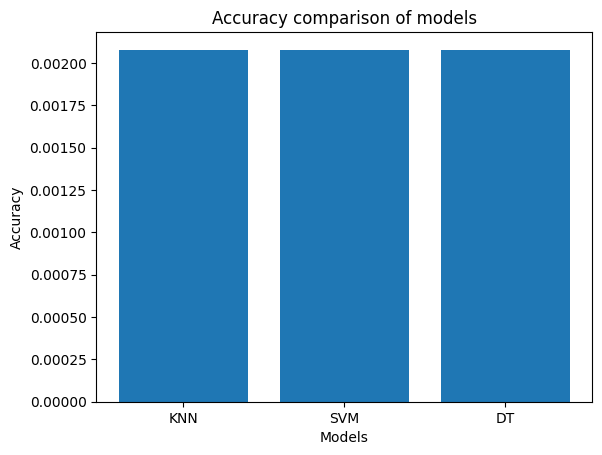

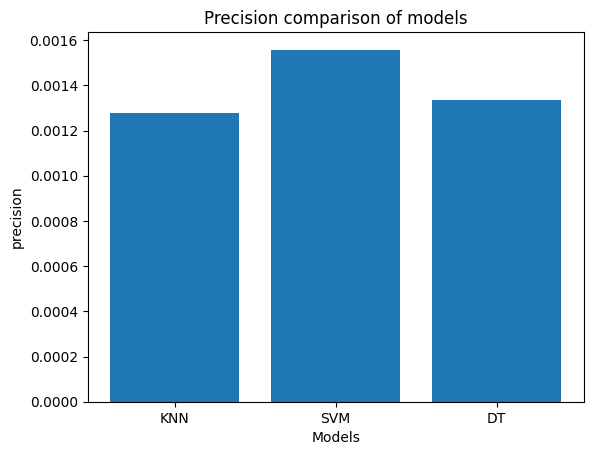

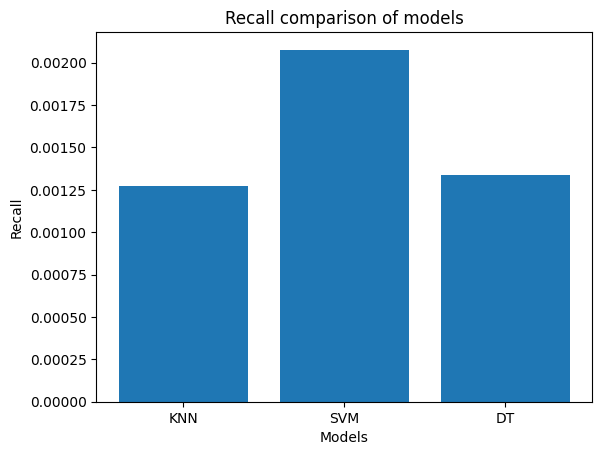

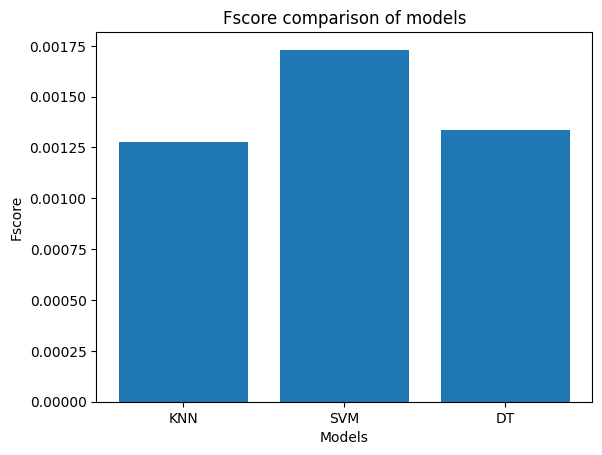

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Converting the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['tags'].values)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['title'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# training and evaluation of the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_fscore = f1_score (y_test, knn_pred,average='macro')

print('knn_accuracy with TF-IDF = ',knn_accuracy)
print('knn_precision with TF-IDF = ',knn_precision)
print('knn_recall with TF-IDF = ',knn_recall)
print('knn_Fscore with TF-IDF = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# training and evaluation of Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='macro')
dt_recall = recall_score(y_test, dt_pred,average='macro')
dt_fscore = f1_score (y_test, dt_pred,average='macro')

print('dt_accuracy with TF-IDF  = ',dt_accuracy)
print('dt_precision with TF-IDF = ',dt_precision)
print('dt_recall with TF-IDF = ',dt_recall)
print('dt_Fscore with TF-IDF = ',dt_fscore)
print("----------------------------------------------------------------")



# training and evaluation of SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='macro')
svm_recall = recall_score(y_test, svm_pred,average='macro')
svm_fscore = f1_score (y_test, svm_pred,average='macro')


print('svm_accuracy with TF-IDF = ',svm_accuracy)
print('svm_precision with TF-IDF = ',svm_precision)
print('svm_recall with TF-IDF = ',svm_recall)
print('svm_Fscore with TF-IDF = ',svm_fscore)
print("----------------------------------------------------------------")

#++++++++++++++++++++++++++++++++++++++++++++++++


# Plotting the accuracy comparison of the models
models = ['KNN', 'SVM','DT']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plotting the Precision comparison of the models
models = ['KNN', 'SVM','DT']
precisions = [knn_precision, svm_precision,dt_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plotting the Recall comparison of the models
models = ['KNN', 'SVM','DT']
recalls = [knn_recall, svm_recall,dt_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plotting the Fscore comparison of the models
models = ['KNN', 'SVM','DT']
fscores = [knn_fscore, svm_fscore,dt_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

#CLUSTERING


In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['tags'], data['title'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

In [58]:
# Perform KMeans clustering with different number of clusters
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca_train)
    wss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

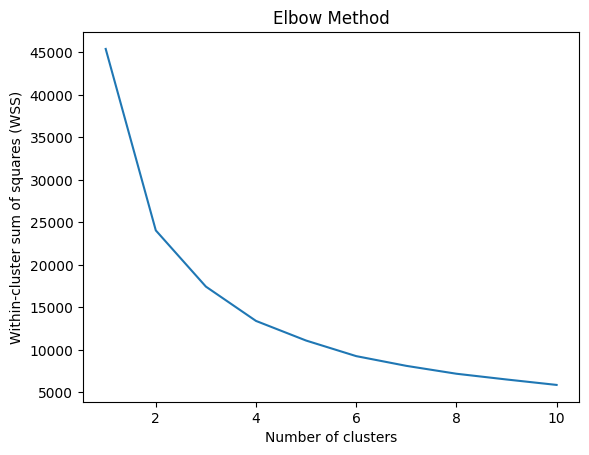

In [59]:
# Plot the within-cluster sum of squares (WSS) against the number of clusters
plt.plot(range(1, 11), wss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



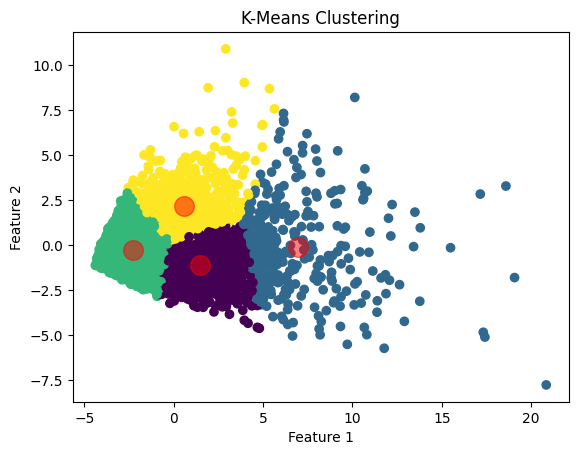

In [60]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


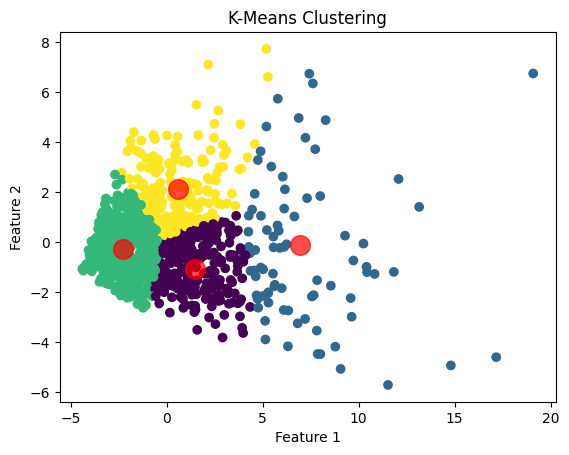

In [61]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [63]:
vector = cv.fit_transform(datafin['tags']).toarray()

In [64]:
vector.shape

(4806, 5000)

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [66]:
datafin[datafin['title'] == 'The Lego Movie'].index[0]

744

In [67]:
def recommend(movie):
    index = datafin[datafin['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(datafin.iloc[i[0]].title)
        

#litmus testing the model 

In [ ]:
inp = input("please enter a movie name to match with similar movies types ")
recommend(inp)

#EXPORTING THE MODEL 

In [ ]:
import pickle

In [ ]:
pickle.dump(datafin,open('model.pkl','wb'))


In [ ]:
model = pickle.load(open('model.pkl','rb'))


In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['title'].iloc[i])
df=pd.DataFrame(temp,columns=['title'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df